In [1]:
import pandas as pd
import numpy as np
from gensim import corpora
from gensim.models import word2vec

wv_model_ko = word2vec.Word2Vec.load('dict/yonhap_word2vec_10.model')


/opt/conda/lib/python3.5/site-packages/gensim/utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


In [2]:
from konlpy.tag import Mecab; m = Mecab()
pos = lambda d: ['/'.join(p) for p in m.pos(d)]

In [15]:
wv_model_ko.most_similar(pos('아버지'))

[('어머니/NNG', 0.8392091989517212),
 ('아내/NNG', 0.752945601940155),
 ('여동생/NNG', 0.6996092200279236),
 ('동생/NNG', 0.6995352506637573),
 ('아들/NNG', 0.6949958801269531),
 ('누나/NNG', 0.6847842931747437),
 ('남편/NNG', 0.673575758934021),
 ('조카/NNG', 0.6631594896316528),
 ('엄마/NNG', 0.6594873070716858),
 ('손녀/NNG', 0.6561130881309509)]

In [32]:
#dictionary_ko = corpora.dictionary.Dictionary.load('dict/yonhap_ko_10.dict')
model_vocab = [word for word in wv_model_ko.vocab.keys()]
len(model_vocab)

80419

In [40]:
from sklearn.manifold import TSNE
import numpy as np

vectors = [wv_model_ko[word] for word in model_vocab[:3000]]

tsne = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)

vectors2d = tsne.fit_transform(vectors)

In [34]:
#한글설정

from matplotlib import font_manager, rc
font_fname = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'     # A font of your choice
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

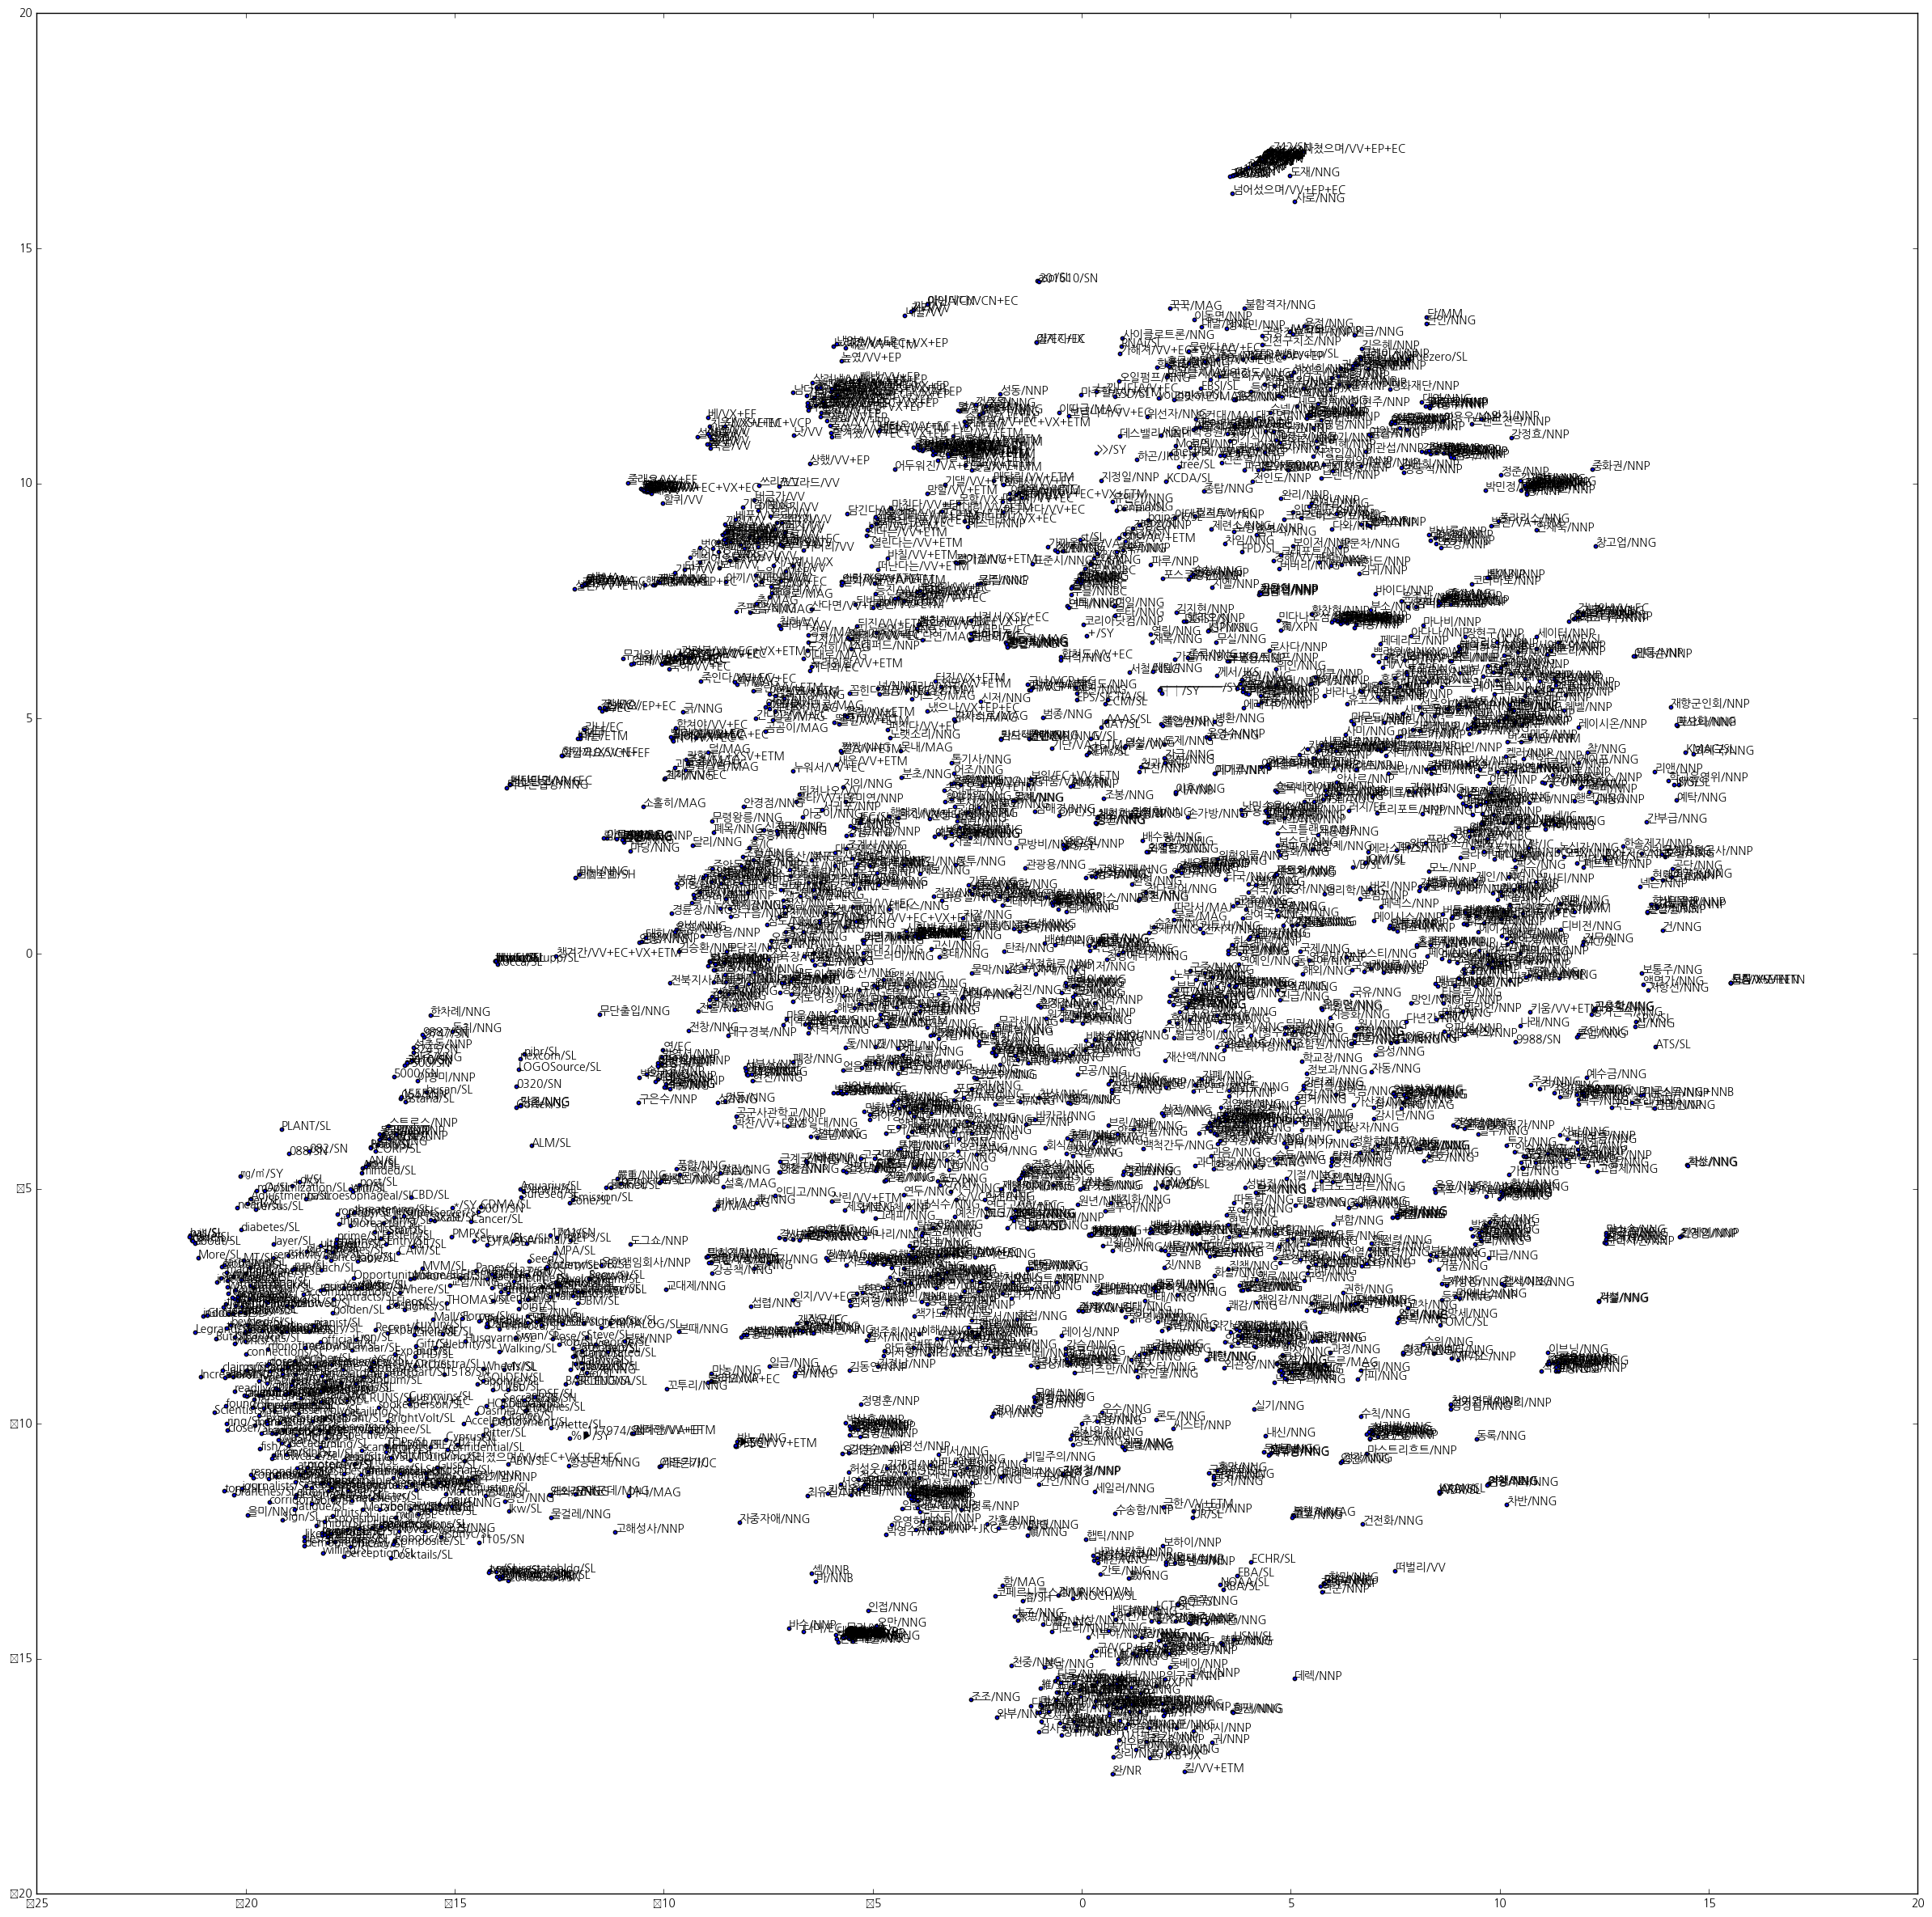

In [42]:
import matplotlib.pyplot as plt
import pylab as Plot
%matplotlib inline

Plot.figure(figsize=(30,30), dpi=20)
plt.scatter(vectors2d[:,0], vectors2d[:,1], 10)

for row_id in range(0,3000):
    target_word = model_vocab[row_id]
    x = vectors2d[row_id, 0]
    y = vectors2d[row_id, 1]
    Plot.annotate(target_word, (x,y))

plt.show()